# Final Project Submission

Please fill out:
* Student name: James Savory
* Student pace: Part Time
* Scheduled project review date/time: August 30, 2019
* Instructor name: Brandon Lewis
* Blog post URL: https://jsavory-94.github.io/lorem_ipsum

# I. Project Aim

The problem aimed at being solved in this analysis is 'Which statistical Categories have the most bearing on whether or not an NBA player makes an all-star team?'

# II. Table Of Contents
The contents of our notebook will be structured using the OSEMN framework. 

1. [Obtaining the Data](#1) <br>
2. [Scrubbing the Data](#2) <br>
3. [Exploring the Data](#3) <br>
4. [Modeling the Data](#4) <br>
5. [Interpreting the Data](#5) <br>


# III. Import Libraries

In [1]:
import pandas as pd #pandas for DataFrames etc.
import numpy as np #numpy for any type of array arithmatic etc.
import matplotlib.pyplot as plt #matplotlib for graphs etc.
import seaborn as sns #seaborn for heatmap graphs
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score #sklearn modeling packages
import seaborn as sns
import pylab

from sklearn.cluster import KMeans #sklearn modeling packages
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


#sklearn metric/pipeline/preprocessing/decomposition packages
from sklearn.metrics import accuracy_score, precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix 
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import operator
import warnings
warnings.filterwarnings('ignore')

/home/james/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


<a id="1"></a>
# 1. Obtaining the data

In [2]:
raw_df = pd.read_excel('mod5-project-dataset.xlsx')
raw_df

,"Data sourced from: https://www.basketball-reference.com/leagues/NBA_2018.html, https://www.basketball-reference.com/leagues/NBA_2019 .html",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,** All-Star column added manually. Data source...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Player,Conference,Season,Age,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS/G,All-Star Votes,ALL-STAR
4,Giannis Antetokounmpo,Eastern,2018-19,24,72,72,32.8,10,17.3,0.578,...,10.3,12.5,5.9,1.3,1.5,3.7,3.2,27.7,4375747,1
5,Khris Middleton,Eastern,2018-19,27,77,77,31.1,6.6,14.9,0.441,...,5.3,6,4.3,1,0.1,2.3,2.2,18.3,238103,1
6,Eric Bledsoe,Eastern,2018-19,29,78,78,29.1,6,12.4,0.484,...,3.6,4.6,5.5,1.5,0.4,2.1,2,15.9,NaN,0
7,Brook Lopez,Eastern,2018-19,30,81,81,28.7,4.4,9.7,0.452,...,4.5,4.9,1.2,0.6,2.2,1,2.3,12.5,NaN,0
8,Malcolm Brogdon,Eastern,2018-19,26,64,64,28.6,5.9,11.7,0.505,...,3.5,4.5,3.2,0.7,0.2,1.4,1.6,15.6,NaN,0
9,Nikola MirotiÄ‡,Eastern,2018-19,27,14,3,22.9,4,9.6,0.415,...,4.4,5.4,1.4,0.7,0.6,0.8,1.5,11.6,NaN,0


The data is quite messy and needs to be scrubbed before it can be used for modelling.

<a id="1"></a>
# 2. Scrubbing the data

### 2.1 Structure Dataframe

In [3]:
raw_df = raw_df.iloc[3:]
header = raw_df.iloc[0]
raw_df = raw_df.rename(columns=raw_df.iloc[0])
raw_df = raw_df.iloc[1:]
df = raw_df

df

,Player,Conference,Season,Age,G,GS,MP,FG,FGA,FG%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS/G,All-Star Votes,ALL-STAR
4,Giannis Antetokounmpo,Eastern,2018-19,24,72,72,32.8,10,17.3,0.578,...,10.3,12.5,5.9,1.3,1.5,3.7,3.2,27.7,4375747,1
5,Khris Middleton,Eastern,2018-19,27,77,77,31.1,6.6,14.9,0.441,...,5.3,6,4.3,1,0.1,2.3,2.2,18.3,238103,1
6,Eric Bledsoe,Eastern,2018-19,29,78,78,29.1,6,12.4,0.484,...,3.6,4.6,5.5,1.5,0.4,2.1,2,15.9,NaN,0
7,Brook Lopez,Eastern,2018-19,30,81,81,28.7,4.4,9.7,0.452,...,4.5,4.9,1.2,0.6,2.2,1,2.3,12.5,NaN,0
8,Malcolm Brogdon,Eastern,2018-19,26,64,64,28.6,5.9,11.7,0.505,...,3.5,4.5,3.2,0.7,0.2,1.4,1.6,15.6,NaN,0
9,Nikola MirotiÄ‡,Eastern,2018-19,27,14,3,22.9,4,9.6,0.415,...,4.4,5.4,1.4,0.7,0.6,0.8,1.5,11.6,NaN,0
10,Pat Connaughton,Eastern,2018-19,26,61,2,20.7,2.7,5.7,0.466,...,3.2,4.2,2,0.5,0.4,0.5,1.3,6.9,NaN,0
11,George Hill,Eastern,2018-19,32,47,0,20.4,2.4,5.7,0.428,...,2,2.6,2.1,0.9,0.1,0.7,1.4,6.8,NaN,0
12,D.J. Wilson,Eastern,2018-19,22,48,3,18.4,2.2,5.2,0.414,...,3.7,4.6,1.1,0.4,0.4,0.7,1.8,5.8,NaN,0
13,Ersan Ä°lyasova,Eastern,2018-19,31,67,7,18.4,2.5,5.7,0.438,...,3.1,4.5,0.8,0.5,0.3,0.7,2.6,6.8,NaN,0


We have blank columns in the dataframe that need to be dropped.

In [4]:
allstars = df[df['ALL-STAR']==True]
allstar_players = allstars.Player.values

def get_player_lastnames(players):
    lastnames = []
    
    for p in players:
        split_names = p.split()
        last_name = split_names[1]
        lastnames.append(last_name)
        
    return ' '.join(lastnames)
    
player_lastnames = get_player_lastnames(allstar_players)
player_lastnames

player_lastnames_clean = 'Antetokounmpo Middleton Leonard Simmons Embiid Irving Oladipo Russell Vucevic Griffin Walker Walker Wade Beal Durant Thompson Curry Jokic Lillard Harden George Westbrook James Davis Nowitzki DeRozan Lowry Irving Horford Embiid James Love Oladipo Dragic Antetokounmpo Beal Wall Drummond Walker Porzingis Harden Thompson Durant Green Curry Lillard George Westbrook Davis Cousins Aldridge Butler Towns'
 

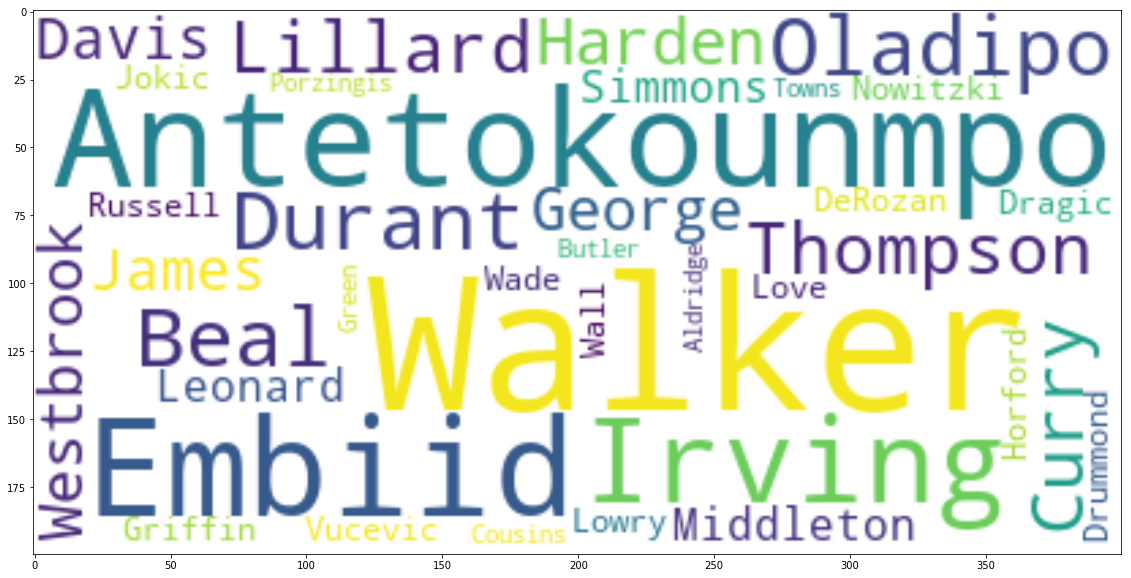

In [5]:
plt.figure( figsize=(20,10) )
wordcloud = WordCloud(background_color="white").generate(player_lastnames_clean)
plt.imshow(wordcloud, interpolation='bilinear')

### 2.2 Manage Missing Data (Null Values)

In [6]:
df.isna().sum()

Player               0
Conference           0
Season               0
Age                  0
G                    0
GS                   0
MP                   0
FG                   0
FGA                  0
FG%                 10
3P                   0
3PA                  0
3P%                106
2P                   0
2PA                  0
2P%                 32
eFG%                10
FT                   0
FTA                  0
FT%                 96
ORB                  0
DRB                  0
TRB                  0
AST                  0
STL                  0
BLK                  0
TOV                  0
PF                   0
PTS/G                0
All-Star Votes    1180
ALL-STAR             0
dtype: int64

In [7]:
df.shape[0]

1232

In each of the offending columns, the NaNs represent less than 8.6% percent of our observations, therefore the offending rows can be dropped with minimal data loss.

### 2.3 Manage Data Types

In [8]:
#Categorical
df['Player'] = df['Player'].astype('category')

#Integer
df['Age'] = df['Age'].astype('int64')
df['G'] = df['G'].astype('int64')
df['GS'] = df['GS'].astype('int64')

#Float
df['MP'] = df['MP'].astype('float64')
df['FG'] = df['FG'].astype('float64')
df['FGA'] = df['FGA'].astype('float64')
df['FG%'] = df['FG%'].astype('float64')
df['3P'] = df['3P'].astype('float64')
df['3PA'] = df['3PA'].astype('float64')
df['3P%'] = df['3P%'].astype('float64')
df['2P'] = df['2P'].astype('float64')
df['2PA'] = df['2PA'].astype('float64')
df['2P%'] = df['2P%'].astype('float64')
df['eFG%'] = df['eFG%'].astype('float64')
df['FT'] = df['FT'].astype('float64')
df['FTA'] = df['FTA'].astype('float64')
df['FT%'] = df['FT%'].astype('float64')
df['ORB'] = df['ORB'].astype('float64')
df['DRB'] = df['DRB'].astype('float64')
df['TRB'] = df['TRB'].astype('float64')
df['AST'] = df['AST'].astype('float64')
df['STL'] = df['STL'].astype('float64')
df['BLK'] = df['BLK'].astype('float64')
df['TOV'] = df['TOV'].astype('float64')
df['PF'] = df['PF'].astype('float64')
df['PTS/G'] = df['PTS/G'].astype('float64')

#Boolean
df['ALL-STAR'] = df['ALL-STAR'].astype('bool')

In [9]:
multicollinear_offenders = ['FG','FGA','2PA','3PA','FTA','TRB','PTS/G']

df = df.drop(multicollinear_offenders, axis=1)
df

,Player,Conference,Season,Age,G,GS,MP,FG%,3P,3P%,...,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,All-Star Votes,ALL-STAR
4,Giannis Antetokounmpo,Eastern,2018-19,24,72,72,32.8,0.578,0.7,0.256,...,0.729,2.2,10.3,5.9,1.3,1.5,3.7,3.2,4375747,True
5,Khris Middleton,Eastern,2018-19,27,77,77,31.1,0.441,2.3,0.378,...,0.837,0.6,5.3,4.3,1.0,0.1,2.3,2.2,238103,True
6,Eric Bledsoe,Eastern,2018-19,29,78,78,29.1,0.484,1.6,0.329,...,0.750,1.1,3.6,5.5,1.5,0.4,2.1,2.0,NaN,False
7,Brook Lopez,Eastern,2018-19,30,81,81,28.7,0.452,2.3,0.365,...,0.842,0.4,4.5,1.2,0.6,2.2,1.0,2.3,NaN,False
8,Malcolm Brogdon,Eastern,2018-19,26,64,64,28.6,0.505,1.6,0.426,...,0.928,1.0,3.5,3.2,0.7,0.2,1.4,1.6,NaN,False
9,Nikola MirotiÄ‡,Eastern,2018-19,27,14,3,22.9,0.415,2.2,0.356,...,0.870,1.0,4.4,1.4,0.7,0.6,0.8,1.5,NaN,False
10,Pat Connaughton,Eastern,2018-19,26,61,2,20.7,0.466,1.1,0.330,...,0.725,1.0,3.2,2.0,0.5,0.4,0.5,1.3,NaN,False
11,George Hill,Eastern,2018-19,32,47,0,20.4,0.428,0.7,0.280,...,0.815,0.6,2.0,2.1,0.9,0.1,0.7,1.4,NaN,False
12,D.J. Wilson,Eastern,2018-19,22,48,3,18.4,0.414,1.0,0.362,...,0.553,0.9,3.7,1.1,0.4,0.4,0.7,1.8,NaN,False
13,Ersan Ä°lyasova,Eastern,2018-19,31,67,7,18.4,0.438,0.9,0.363,...,0.824,1.4,3.1,0.8,0.5,0.3,0.7,2.6,NaN,False


In [10]:
allstars_df = df[df['ALL-STAR']==True]
eastern_allstars_df = allstars_df[allstars_df['Conference']=='Eastern']
eastern_allstars2019_df = eastern_allstars_df[eastern_allstars_df['Season']=='2018-19']
eastern_allstars2018_df = eastern_allstars_df[eastern_allstars_df['Season']=='2017-18']

western_allstars_df = allstars_df[allstars_df['Conference']=='Western']
western_allstars2019_df = western_allstars_df[western_allstars_df['Season']=='2018-19']
western_allstars2018_df = western_allstars_df[western_allstars_df['Season']=='2017-18']

#### WESTERN 2019

In [11]:
western_allstars2019_df

,Player,Conference,Season,Age,G,GS,MP,FG%,3P,3P%,...,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,All-Star Votes,ALL-STAR
320,Kevin Durant,Western,2018-19,30,78,78,34.6,0.521,1.8,0.353,...,0.885,0.4,5.9,5.9,0.7,1.1,2.9,2.0,3150648,True
321,Klay Thompson,Western,2018-19,28,78,78,34.0,0.467,3.1,0.402,...,0.816,0.5,3.4,2.4,1.1,0.6,1.5,2.0,1578140,True
322,Stephen Curry,Western,2018-19,30,69,69,33.8,0.472,5.1,0.437,...,0.916,0.7,4.7,5.2,1.3,0.4,2.8,2.4,3861038,True
338,Nikola JokiÄ‡,Western,2018-19,23,80,80,31.3,0.511,1.0,0.307,...,0.821,2.9,8.0,7.3,1.4,0.7,3.1,2.9,1445989,True
355,Damian Lillard,Western,2018-19,28,80,80,35.5,0.444,3.0,0.369,...,0.912,0.9,3.8,6.9,1.1,0.4,2.7,1.9,1043785,True
373,James Harden,Western,2018-19,29,78,78,36.8,0.442,4.8,0.368,...,0.879,0.8,5.8,7.5,2.0,0.7,5.0,3.1,2905488,True
414,Paul George,Western,2018-19,28,77,77,36.9,0.438,3.8,0.386,...,0.839,1.4,6.8,4.1,2.2,0.4,2.7,2.8,3122346,True
415,Russell Westbrook,Western,2018-19,30,73,73,36.0,0.428,1.6,0.290,...,0.656,1.5,9.6,10.7,1.9,0.5,4.5,3.4,2512374,True
495,LeBron James,Western,2018-19,34,55,55,35.2,0.510,2.0,0.339,...,0.665,1.0,7.4,8.3,1.3,0.6,3.6,1.7,4620809,True
567,Anthony Davis,Western,2018-19,25,56,56,33.0,0.517,0.9,0.331,...,0.794,3.1,8.9,3.9,1.6,2.4,2.0,2.4,2520728,True


In [12]:
x = tuple(western_allstars2019_df.MP.values)
y = tuple(western_allstars2019_df['All-Star Votes'].values)
labels = western_allstars2019_df.Player
labels[0]

'Kevin Durant'

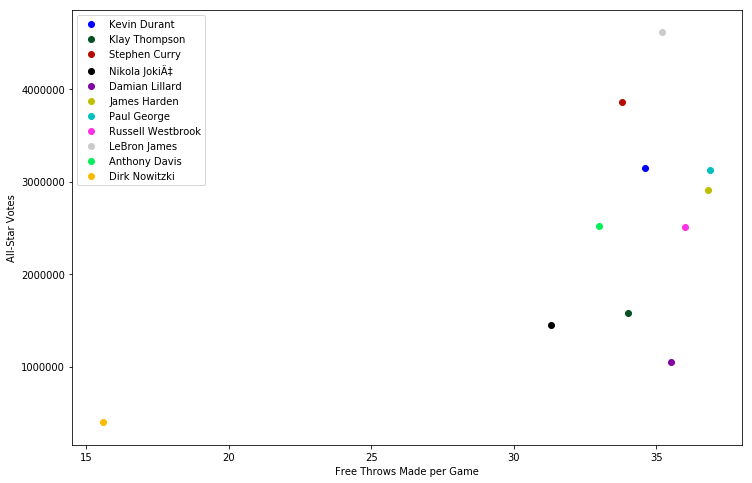

In [13]:
plt.figure(figsize = (12,8))
plt.scatter(x[0],y[0], label = labels[0], c='b', marker = "o")
plt.scatter(x[1],y[1], label = labels[1], c='#055020', marker = "o")
plt.scatter(x[2],y[2], label = labels[2], c='#B40C01', marker = "o")
plt.scatter(x[3],y[3], label = labels[3], c='k', marker = "o")
plt.scatter(x[4],y[4], label = labels[4], c='#8104A2', marker = "o")
plt.scatter(x[5],y[5], label = labels[5], c='y', marker = "o")
plt.scatter(x[6],y[6], label = labels[6], c='c', marker = "o")
plt.scatter(x[7],y[7], label = labels[7], c='#FF33E3', marker = "o")
plt.scatter(x[8],y[8], label = labels[8], c='#CBCBCB', marker = "o")
plt.scatter(x[9],y[9], label = labels[9], c='#03EE58', marker = "o")
plt.scatter(x[10],y[10], label = labels[10], c='#fcba03', marker = "o")

plt.legend(fontsize=10)

plt.xlabel("Free Throws Made per Game")
plt.ylabel("All-Star Votes")
plt.show()

#### EASTERN CONFERENCE 2019

In [24]:
eastern_allstars2019_df

,Player,Conference,Season,Age,G,GS,MP,FG%,3P,3P%,...,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,All-Star Votes,ALL-STAR
4,Giannis Antetokounmpo,Eastern,2018-19,24,72,72,32.8,0.578,0.7,0.256,...,0.729,2.2,10.3,5.9,1.3,1.5,3.7,3.2,4375747,True
5,Khris Middleton,Eastern,2018-19,27,77,77,31.1,0.441,2.3,0.378,...,0.837,0.6,5.3,4.3,1.0,0.1,2.3,2.2,238103,True
29,Kawhi Leonard,Eastern,2018-19,27,60,60,34.0,0.496,1.9,0.371,...,0.854,1.3,6.0,3.3,1.8,0.4,2.0,1.5,3580531,True
51,Ben Simmons,Eastern,2018-19,22,79,79,34.2,0.563,0.0,0.000,...,0.600,2.2,6.6,7.7,1.4,0.8,3.5,2.6,1184221,True
53,Joel Embiid,Eastern,2018-19,24,64,64,33.7,0.484,1.2,0.300,...,0.804,2.5,11.1,3.7,0.7,1.9,3.5,3.3,2783833,True
76,Kyrie Irving,Eastern,2018-19,26,67,67,33.0,0.487,2.6,0.401,...,0.873,1.1,3.9,6.9,1.5,0.5,2.6,2.5,3881766,True
93,Victor Oladipo,Eastern,2018-19,26,36,36,31.9,0.423,2.1,0.343,...,0.730,0.6,5.0,5.2,1.7,0.3,2.3,2.0,948260,True
111,D'Angelo Russell,Eastern,2018-19,22,81,81,30.2,0.434,2.9,0.369,...,0.780,0.7,3.2,7.0,1.2,0.2,3.1,1.7,346027,True
131,Nikola VuÄﾍeviÄ‡,Eastern,2018-19,28,80,80,31.4,0.518,1.1,0.364,...,0.789,2.8,9.2,3.8,1.0,1.1,2.0,2.0,255487,True
146,Blake Griffin,Eastern,2018-19,29,75,75,35.0,0.462,2.5,0.362,...,0.753,1.3,6.2,5.4,0.7,0.4,3.4,2.7,843785,True


In [27]:
x1 = tuple(eastern_allstars2019_df.MP.values)
y1 = tuple(eastern_allstars2019_df['All-Star Votes'].values)
labels2 = eastern_allstars2019_df.Player

Text(0,0.5,'All-Star Votes')

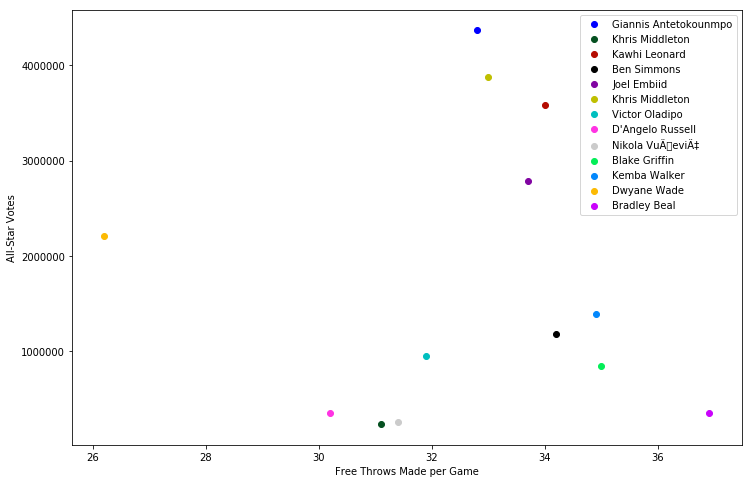

In [28]:
plt.figure(figsize = (12,8))
plt.scatter(x1[0],y1[0], label = labels2[0], c='b', marker = "o")
plt.scatter(x1[1],y1[1], label = labels2[1], c='#055020', marker = "o")
plt.scatter(x1[2],y1[2], label = labels2[2], c='#B40C01', marker = "o")
plt.scatter(x1[3],y1[3], label = labels2[3], c='k', marker = "o")
plt.scatter(x1[4],y1[4], label = 'Joel Embiid', c='#8104A2', marker = "o")
plt.scatter(x1[5],y1[5], label = labels2[5], c='y', marker = "o")
plt.scatter(x1[6],y1[6], label = labels2[6], c='c', marker = "o")
plt.scatter(x1[7],y1[7], label = labels2[7], c='#FF33E3', marker = "o")
plt.scatter(x1[8],y1[8], label = labels2[8], c='#CBCBCB', marker = "o")
plt.scatter(x1[9],y1[9], label = labels2[9], c='#03EE58', marker = "o")
plt.scatter(x1[10],y1[10], label = labels2[10], c='#0388fc', marker = "o")
plt.scatter(x1[11],y1[11], label = labels2[11], c='#fcba03', marker = "o")
plt.scatter(x1[12],y1[12], label = labels2[12], c='#ca03fc', marker = "o")

plt.legend(fontsize=10)

plt.xlabel("Free Throws Made per Game")
plt.ylabel("All-Star Votes")

In [30]:
def count_allstar_vs_non(lower, upper):
    range_df = df[(df['MP'] >= lower) & (df['MP'] < upper)]
    non_allstars = range_df[range_df['ALL-STAR']==False]
    allstars = range_df[range_df['ALL-STAR']==True]
    
    print(f'---Between {lower} and {upper} Minutes Played---')
    print('all stars: ' + str(allstars.shape[0]))
    print('non all stars: ' + str(non_allstars.shape[0]))

In [40]:
count_allstar_vs_non(0,30)
count_allstar_vs_non(30,31)
count_allstar_vs_non(31,32)
count_allstar_vs_non(32,33)
count_allstar_vs_non(33,34)
count_allstar_vs_non(34,35)
count_allstar_vs_non(35,36)
count_allstar_vs_non(36,37)
count_allstar_vs_non(37,48)

---Between 0 and 30 Minutes Played---
all stars: 3
non all stars: 1042
---Between 30 and 31 Minutes Played---
all stars: 2
non all stars: 25
---Between 31 and 32 Minutes Played---
all stars: 6
non all stars: 36
---Between 32 and 33 Minutes Played---
all stars: 6
non all stars: 20
---Between 33 and 34 Minutes Played---
all stars: 7
non all stars: 30
---Between 34 and 35 Minutes Played---
all stars: 10
non all stars: 18
---Between 35 and 36 Minutes Played---
all stars: 5
non all stars: 4
---Between 36 and 37 Minutes Played---
all stars: 13
non all stars: 5
---Between 37 and 48 Minutes Played---
all stars: 0
non all stars: 0


In [55]:
all_stars = [3,2,6,6,7,10,5,13]
non_all_stars = [1042,25,36,20,30,18,4,5]
objects = ('< 30','30-31','31-32','32-33','33-34','34-35','35-36','36-37')

def divide_lists(list1,list2):
    master_list = []
    summed_list = []
    
    i=0 
    while i < len(list1):
        summed = all_stars[i]+non_all_stars[i]
        summed_list.append(summed)
        i+=1
    
    j=0
    while j < len(list1):
        divided = all_stars[j]/summed_list[j]
        master_list.append(divided)
        j+=1
    
    return master_list

prob_all_star = divide_lists(all_stars,non_all_stars)
#prob_all_star = prob_all_star[:-2]
#prob_all_star[-1] = 0

prob_all_star

[0.0028708133971291866,
 0.07407407407407407,
 0.14285714285714285,
 0.23076923076923078,
 0.1891891891891892,
 0.35714285714285715,
 0.5555555555555556,
 0.7222222222222222]

In [20]:
sum(non_all_stars) + sum(all_stars)

1085

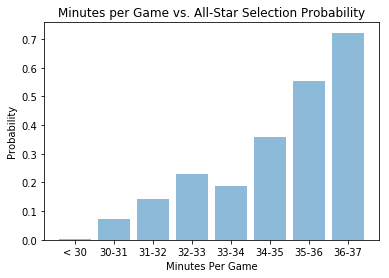

In [56]:
y_pos = np.arange(len(objects))
performance = [10,8,6,4,2,1]

plt.bar(y_pos, prob_all_star, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Probability')
plt.xlabel('Minutes Per Game')
plt.title('Minutes per Game vs. All-Star Selection Probability')
plt.show()

### 2.6 Feature Scale

In [22]:
def scale_df(df): #Simple function to easily be able to scale my data at any point
    scaler= StandardScaler()
    scaled_df= pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
    return scaled_df

In [23]:
X = df.ix[:,1:-1]
X = scale_df(X)
X

ValueError: could not convert string to float: 'Eastern'

# 3.0 Explore

We will look to posit an idea of how player performance varies from all-star to non all-star by looking at the distribution of each.

## 3.1 All-Stars

In [ ]:
pd.options.display.max_columns = 999

all_star = df[df['ALL-STAR']==True]
all_star[all_star['Player']=='Blake Griffin']

In [ ]:
def plot_histograms(df):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(331)
    ax.set_title("Minutes Played Frequency Distribution")
    df['MP'].plot.hist()

    ax1 = plt.subplot(332)
    ax1.set_title("3 Pointers Made Distribution")
    df['3P'].plot.hist()

    ax2 = plt.subplot(333)
    ax2.set_title("3 Point Percentage")
    df['3P%'].plot.hist()

    ax3 = plt.subplot(334)
    ax3.set_title('2 Pointers Made Per Game')
    df['2P'].plot.hist()

    ax4 = plt.subplot(335)
    ax4.set_title('2 Point Percentage')
    df['2P%'].plot.hist()

    ax5 = plt.subplot(336)
    ax5.set_title('Free Throws Made Per Game')
    df['FT'].plot.hist()

    ax6 = plt.subplot(337)
    ax6.set_title('Free Throw Percentage')
    df['FT%'].plot.hist()

    ax7 = plt.subplot(338)
    ax7.set_title('Offensive Rebounds Per Game')
    df['ORB'].plot.hist()

    ax8 = plt.subplot(339)
    ax8.set_title('Defensive Rebounds Per Game')
    df['DRB'].plot.hist()
    
plot_histograms(all_star)

## 3.2 Non All-Star

In [ ]:
non_all_star = df[df['ALL-STAR']==False]
all_star.FT.values

In [ ]:
non_all_star.FT.values

In [ ]:
my_series = pandas.Series([1,2,2,3,3,3, "fred", 1.8, 1.8])
>>> my_series
0       1
1       2
2       2
3       3
4       3
5       3
6    fred
7     1.8
8     1.8
>>> counts = my_series.value_counts()
>>> counts
3       3
2       2
1.8     2
fred    1
1       1
>>> len(counts)
5
>>> sum(counts)
9
>>> counts["fred"]
1
>>> dict(counts)
{1.8: 2, 2: 2, 3: 3, 1: 1, 'fred': 1}


In [ ]:
plot_histograms(non_all_star)

Noticeable discrepancies include:

#### Two pointers made per game
For All-Stars the category is distributed approximately normally around the mode of 6 two-point field goals made. <br>
For Non All-Stars the category is negatively skewed around the mode of 1 two-point field goal made per game.

#### Three pointers made per game
For All-Stars the category is positively skewed around the mean of 2.5 three point field goals made per game. <br>
For Non All-Stars the category is positively skewed around the mean of 1 three point field goal made per game.

#### Free throws made per game
For All-Stars the category is distributed approximately normally around the mode of 6 free throws made made. <br>
For Non All-Stars the category is negatively skewed around the mode of 1 free thwo made per game.

#### Offensive rebounds  per game
For All-Stars the category is distributed approximately normally around the mode of 1 offensive rebound per game. <br>
For Non All-Stars the category is negatively skewed around the mode of 0 offensive rebounds per game.

# 4.0 Model

In [ ]:
y = raw_df['ALL-STAR'].values
y = y.astype('int')

In [ ]:
def random_forest(df,X,y): #Random Forest model
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2) #train test split
    clf= RandomForestClassifier(random_state=0) #classifier defined
    clf.fit(X_train, y_train) #fitted data
    preds= clf.predict(X_test) #predictions of model using test data
    acc = round(accuracy_score(preds, y_test) * 100,2) #basic accuracy score
    print("Accuracy is :{0}%".format(acc))
    feat_importances = pd.DataFrame(clf.feature_importances_, index=X.columns, columns=['Score']) #creating a list of top 10 features from RF model
    feat_importances = feat_importances.sort_values(by='Score',ascending=True) #sorting values
    feat_importances.plot(kind='barh') #plotting the features in a horizontal bar chart
    plt.show()
    pd.crosstab(y_test, preds, rownames=['Actual Result'], colnames=['Predicted Result']) #confusion matrix to show where the model predicted what positions
    
    Refined_X=feat_importances.index[-10:] #rerunning the model again this time using only the top 10 features
    X_key_features=df[Refined_X]

    X_train, X_test, y_train, y_test = train_test_split(X_key_features,y_key_features, test_size=.2)
    clf= RandomForestClassifier()
    clf.fit(X_train, y_train)
    preds= clf.predict(X_test)
    acc = round(accuracy_score(preds, y_test) * 100,2)
    print("Accuracy is :{0}%".format(acc))
    feat_importances = pd.DataFrame(clf.feature_importances_, index=X_key_features.columns, columns=['Score'])
    feat_importances = feat_importances.sort_values(by='Score',ascending=True)
    feat_importances.plot(kind='barh')
    plt.show()
    print(classification_report(y_test,preds))
    return pd.crosstab(y_test, preds, rownames=['Actual Result'], colnames=['Predicted Result'])


In [ ]:
def SVM(df,X,y): #Support Vector Machine Model
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2) #train test split
    svclassifier = SVC(kernel='linear') #defining classifier
    svclassifier.fit(X_train, y_train) #fitting SVM classifier
    y_pred = svclassifier.predict(X_test) #predicting y values using classifier and X_test
    pd.crosstab(y_test, y_pred, rownames=['Actual Result'], colnames=['Predicted Result']) #confusion matrix again
    acc = round(accuracy_score(y_pred, y_test) * 100,2) #accuracy score
    print("Accuracy is :{0}%".format(acc))
    print(classification_report(y_test,y_pred)) #classification score with recall, precision, and F1 score

In [ ]:
def ADABOOST(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2) #train test split
    adaboost_clf = AdaBoostClassifier() #adaboost classifier 
    adaboost_clf.fit(X_train, y_train) #fit the model
    y_pred= adaboost_clf.predict(X_test)#predict the value of y using X_test
    acc = round(accuracy_score(y_pred, y_test) * 100,2) #accuracy score
    print("Accuracy is :{0}%".format(acc))
    print(classification_report(y_test,y_pred)) #classification report
    return pd.crosstab(y_test, y_pred, rownames=['Actual Result'], colnames=['Predicted Result']) #confusion matrix

In [ ]:
random_forest(df,X,y)

In [ ]:
SVM(raw_df, X, y)

In [ ]:
ADABOOST(X,y)

Support Vector Machine provides the modelling fit for our data with 97.24% accuracy.

Our models predictions of Free Throws Taken and Three Pointers Made as the predominant drivers of all-star selection agree with the distributions produced in our EDA process.

# 5.0 Interpreting

In an attempt to interpret why our model selected the categories it did, we will look at the top 20 leaders in eachcategory and examine the talent level of the players.

#### Free Throws Made Leaders

In [ ]:
df_sorted_FT = df.sort_values(by=['FT'], ascending=False)
df_sorted_FT.iloc[:20]

It's very clear why free throws made is such a strong predictor - with the exception of arguably Jeremy Lin, all players in this group are multifaceted scorers capable of manipulating defenses into committing fouls consistently.

#### 3 pointers made

In [ ]:
df_sorted_3P = df.sort_values(by=['3P'], ascending=False)
df_sorted_3P.iloc[:20]

It is clear why 3 pointers made is a powerful predictor - three point ability is a major part of what makes top talents like Steph Curry, James Harden and Paul George successful.

It is likely not as powerful as free throws made because it also selecting for specialists who don't have much standout ability other than their outside shooting such as JJ Reddick, Wayne Ellington and R.J. Hunter.

#### Minutes Played

In [ ]:
df_sorted_MP = df.sort_values(by=['MP'], ascending=False)
df_sorted_MP.iloc[:20]

This group contains the workhorses of the league who log the most minutes.

It makes sense that this category is a strong predictor, as coaches will obviously play their star players for as long as they can to have their best talent on floor.

It is likely not as powerful as free throws made because it is also selecting for high stamina players who don't necessarily have all-star level talent such as Jrue Holiday, Andrew Wiggins and Khris Middleton.

#### Conclusion

Free throws attempted was the most powerful predictor of whether or not a player becomes an all-star because of how all-encompassing it is. Consistently manipulating an opponent's defense into committing fouls requires the use of many skills such as ball handling, athleticism, and knowledge of opponent strategies and tendencies. 


With the exception of assists and minutes played, all other stats are unidimensional measures of a player's competency in only one particular area:
- 3P/3P% : how skillful an outside scorer a player is
- 2P/2P% : how skillful an inside scorer a player is
- ORB/DRB : how skillful a rebounder a player is
- STL: how skillful a player is at stealing the ball
- BLK: how skillful a player is at blocking shots

